<a href="https://colab.research.google.com/github/TonySC1300/Simulacion1/blob/main/Catalogo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribuciones continuas
## Distribución Uniforme Continua $U \sim (0,1)$
### Función de Densidad de Probabilidad (PDF)

$$
f(x) =
\begin{cases}
\frac{1}{b - a}, & \text{si } a \leq x \leq b \\
0, & \text{en otro caso}
\end{cases}
$$

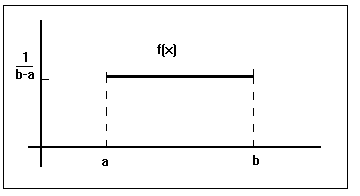

### Función de Distribución Acumulada (CDF)

$$
F(x) =
\begin{cases}
0, & \text{si } x < a \\
\frac{x - a}{b - a}, & \text{si } a \leq x \leq b \\
1, & \text{si } x > b
\end{cases}
$$

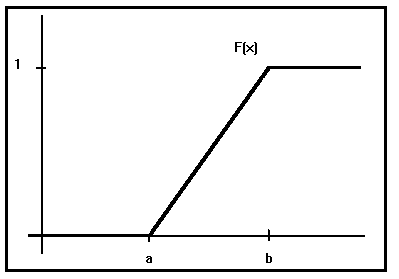

### Media

$$
\mu = \mathbb{E}[X] = \frac{a + b}{2}
$$

### Varianza

$$
\text{Var}(X) = \frac{(b - a)^2}{12}
$$

### Desviación Estándar

$$
\sigma = \sqrt{Var(X)} = \frac{b - a}{\sqrt{12}}
$$

### Pseudocodigo

Entradas:

    a: límite inferior
    b: límite superior

Procedimiento:

1. Generar un número aleatorio R entre $0$ y $1$ $(R \sim U(0,1))$
2. Calcular X = a + (b - a) * R
3. Retornar X


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import random

In [ ]:
a = 2
b = 7

In [ ]:
# Teóricos
media_teo = (a + b) / 2
var_teo = (b - a)**2 / 12
std_teo = np.sqrt(var_teo)

In [ ]:
def simular_uniforme(n):
  lista = []
  for _ in range(n):
    R = random()
    x = a + (b - a) * R
    lista.append(x)
  return lista

In [ ]:
k = 100000

# Llamada a la función
d = simular_uniforme(k)

In [ ]:
media_emp = np.mean(d)
var_emp = np.var(d)
std_emp = np.std(d)

In [ ]:
# Imprimir resultados
print(f"Intervalo: [{a}, {b}] con {k} simulaciones")
print(f"Media teórica: {media_teo:.4f} | Empírica: {media_emp:.4f}")
print(f"Varianza teórica: {var_teo:.4f} | Empírica: {var_emp:.4f}")
print(f"Desviación estándar teórica: {std_teo:.4f} | Empírica: {std_emp:.4f}")
print("")

Intervalo: [2, 7] con 100000 simulaciones
Media teórica: 4.5000 | Empírica: 4.4932
Varianza teórica: 2.0833 | Empírica: 2.0773
Desviación estándar teórica: 1.4434 | Empírica: 1.4413



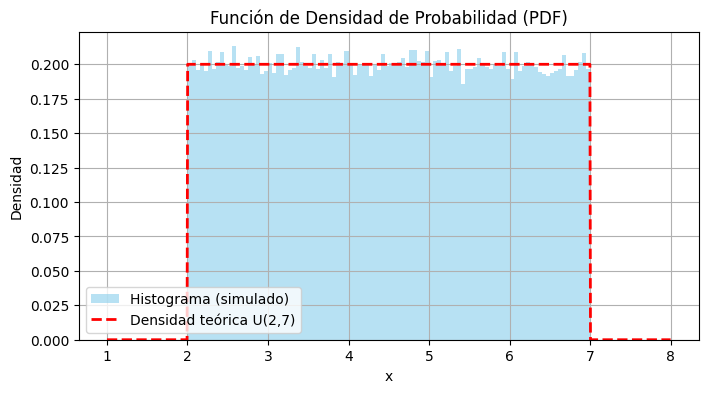

In [ ]:
# === GRAFICAR HISTOGRAMA + DENSIDAD TEÓRICA ===
x = np.linspace(a - 1, b + 1, 1000)
pdf = np.where((x >= a) & (x <= b), 1 / (b - a), 0)

plt.figure(figsize=(8, 4))
plt.hist(d, bins=100, density=True, alpha=0.6, label="Histograma (simulado)", color='skyblue')
plt.plot(x, pdf, 'r--', label=f'Densidad teórica U({a},{b})', linewidth=2)
plt.title('Función de Densidad de Probabilidad (PDF)')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

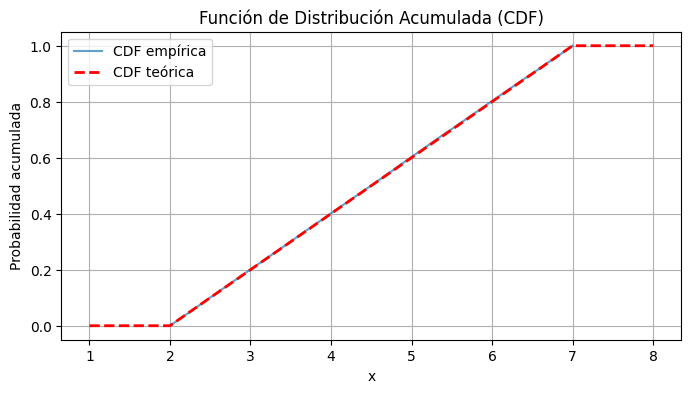

In [ ]:
# === GRAFICAR FUNCION ACUMULADA ===
# Ordenar datos simulados para aproximar CDF empírica
d_sorted = np.sort(d)
y_cdf = np.arange(1, k + 1) / k

# CDF teórica
def cdf_uniforme(x, a, b):
    return np.where(x < a, 0, np.where(x > b, 1, (x - a) / (b - a)))

x_vals = np.linspace(a - 1, b + 1, 1000)
cdf_teo = cdf_uniforme(x_vals, a, b)

plt.figure(figsize=(8, 4))
plt.plot(d_sorted, y_cdf, label='CDF empírica', alpha=0.7)
plt.plot(x_vals, cdf_teo, 'r--', label='CDF teórica', linewidth=2)
plt.title('Función de Distribución Acumulada (CDF)')
plt.xlabel('x')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.grid(True)
plt.show()

## Distribución Triangular
## $X \sim Triangular(a,b,c)$

###Función de Densidad de Probabilidad (PDF)

$$
f(x) =
\begin{cases}
0, & x < a \\
\frac{2(x - a)}{(b - a)(c - a)}, & a \le x < c \\
\frac{2(b - x)}{(b - a)(b - c)}, & c \le x \le b \\
0, & x > b
\end{cases}
$$



### Función de Distribución Acumulada (CDF)

$$
F(x) =
\begin{cases}
0, & x < a \\
\frac{(x - a)^2}{(b - a)(c - a)}, & a \le x < c \\
1 - \frac{(b - x)^2}{(b - a)(b - c)}, & c \le x \le b \\
1, & x > b
\end{cases}
$$

### Media

$$
\mu = \mathbb{E}[X] = \frac{a + b + c}{3}
$$

### Varianza

$$
\text{Var}(X) = \frac{a^2 + b^2 + c^2 - ab - ac - bc}{18}
$$

### Desviación Estándar

$$
\sigma = \sqrt{Var(X)}
$$

### Pseudocódigo para simular una variable aleatoria Triangular$(a, b, c)$

Entradas:

    a: límite inferior
    b: límite superior
    c: modo (a < c < b)

Procedimiento:

1. Generar un número aleatorio $U \sim Uniforme(0, 1)$

2. Calcular $F_c =\frac{c - a}{b - a}$

3. Si $U < F_c$ entonces:

    $X = a + \sqrt{U * (b - a) * (c - a)}$

  En otro caso:

    $X = b - \sqrt{(1 - U) * (b - a) * (b - c)}$

4. Retornar $X$




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from math import sqrt

In [ ]:
# Parámetros de la distribución triangular
tri_a = 2
tri_b = 7
tri_c = 5

In [ ]:
# Teóricos
tri_media_teo = (tri_a + tri_b + tri_c) / 3
tri_var_teo = (tri_a**2 + tri_b**2 + tri_c**2 - tri_a*tri_b - tri_a*tri_c - tri_b*tri_c) / 18
tri_std_teo = np.sqrt(tri_var_teo)

In [ ]:
# Función para simular la distribución triangular
def simular_triangular(n):
    muestras_tri = []
    F_c = (tri_c - tri_a) / (tri_b - tri_a)
    for _ in range(n):
        R = random()
        if R < F_c:
            x_tri = tri_a + sqrt(R * (tri_b - tri_a) * (tri_c - tri_a))
        else:
            x_tri = tri_b - sqrt((1 - R) * (tri_b - tri_a) * (tri_b - tri_c))
        muestras_tri.append(x_tri)
    return muestras_tri

In [ ]:
# Simulación
tri_k = 100000
tri_muestras = simular_triangular(tri_k)

In [ ]:
# Estadísticas empíricas
tri_media_emp = np.mean(tri_muestras)
tri_var_emp = np.var(tri_muestras)
tri_std_emp = np.std(tri_muestras)

In [ ]:
# Imprimir resultados
print(f"Intervalo: [{tri_a}, {tri_b}] con modo {tri_c} y {tri_k} simulaciones")
print(f"Media teórica: {tri_media_teo:.4f} | Empírica: {tri_media_emp:.4f}")
print(f"Varianza teórica: {tri_var_teo:.4f} | Empírica: {tri_var_emp:.4f}")
print(f"Desviación estándar teórica: {tri_std_teo:.4f} | Empírica: {tri_std_emp:.4f}")
print("")

Intervalo: [2, 7] con modo 5 y 100000 simulaciones
Media teórica: 4.6667 | Empírica: 4.6650
Varianza teórica: 1.0556 | Empírica: 1.0550
Desviación estándar teórica: 1.0274 | Empírica: 1.0271



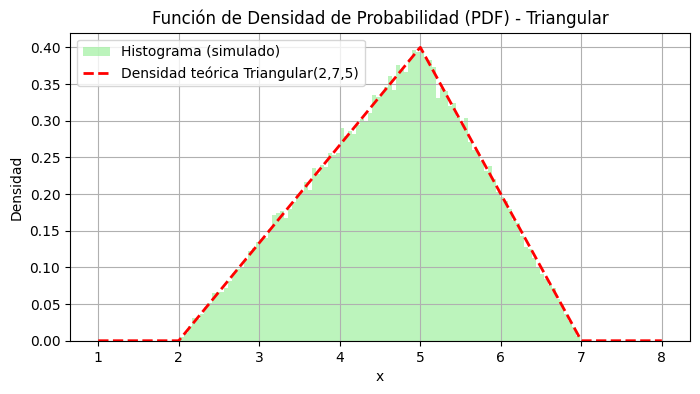

In [ ]:
# === GRAFICAR HISTOGRAMA + DENSIDAD TEÓRICA ===
x_tri_vals = np.linspace(tri_a - 1, tri_b + 1, 1000)
pdf_tri = np.piecewise(x_tri_vals,
    [x_tri_vals < tri_a,
     (x_tri_vals >= tri_a) & (x_tri_vals < tri_c),
     (x_tri_vals >= tri_c) & (x_tri_vals <= tri_b),
     x_tri_vals > tri_b],
    [0,
     lambda x: 2 * (x - tri_a) / ((tri_b - tri_a) * (tri_c - tri_a)),
     lambda x: 2 * (tri_b - x) / ((tri_b - tri_a) * (tri_b - tri_c)),
     0])

plt.figure(figsize=(8, 4))
plt.hist(tri_muestras, bins=100, density=True, alpha=0.6, label="Histograma (simulado)", color='lightgreen')
plt.plot(x_tri_vals, pdf_tri, 'r--', label=f'Densidad teórica Triangular({tri_a},{tri_b},{tri_c})', linewidth=2)
plt.title('Función de Densidad de Probabilidad (PDF) - Triangular')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

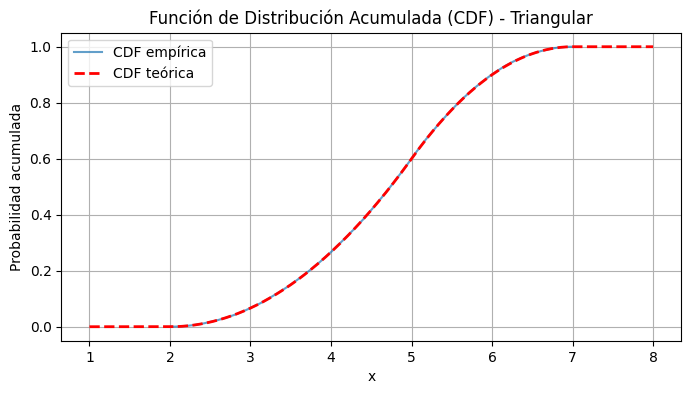

In [ ]:
# === GRAFICAR FUNCION ACUMULADA ===
tri_muestras_ordenadas = np.sort(tri_muestras)
tri_cdf_emp = np.arange(1, tri_k + 1) / tri_k

def cdf_triangular(x, a, b, c):
    return np.piecewise(x,
        [x < a,
         (x >= a) & (x < c),
         (x >= c) & (x <= b),
         x > b],
        [0,
         lambda x: ((x - a) ** 2) / ((b - a) * (c - a)),
         lambda x: 1 - ((b - x) ** 2) / ((b - a) * (b - c)),
         1])

x_tri_vals_cdf = np.linspace(tri_a - 1, tri_b + 1, 1000)
cdf_tri_teo = cdf_triangular(x_tri_vals_cdf, tri_a, tri_b, tri_c)

plt.figure(figsize=(8, 4))
plt.plot(tri_muestras_ordenadas, tri_cdf_emp, label='CDF empírica', alpha=0.7)
plt.plot(x_tri_vals_cdf, cdf_tri_teo, 'r--', label='CDF teórica', linewidth=2)
plt.title('Función de Distribución Acumulada (CDF) - Triangular')
plt.xlabel('x')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.grid(True)
plt.show()

## Distribución Exponencial $X \sim Exp(\lambda)$

### Función de Densidad de Probabilidad (PDF)

$$
f(x) =
\begin{cases}
\lambda e^{-\lambda x}, & x \geq 0 \\
0, & x < 0
\end{cases}
$$

### Función de Distribución Acumulada (CDF)

$$
F(x) =
\begin{cases}
1 - e^{-\lambda x}, & x \geq 0 \\
0, & x < 0
\end{cases}
$$

### Media

$$
\mu = \mathbb{E}[X] = \frac{1}{\lambda}
$$

### Varianza

$$
\text{Var}(X) = \frac{1}{\lambda^2}
$$

### Desviación Estándar

$$
\sigma = \sqrt{Var(X)} = \frac{1}{\lambda}
$$

### Pseudocódigo para simular una variable aleatoria Exponencial $(\lambda)$


Entrada:

    λ: parámetro de tasa (λ > 0) tasa de ocurrencia del evento (eventos por unidad de tiempo)

Procedimiento:
    
1. Generar un número aleatorio U ~ Uniforme(0, 1)

2. Calcular $X = -\frac {1}{λ} * ln(1 - U)$
    
3. Retornar $X$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from math import log

In [ ]:
# Parámetro de la distribución exponencial
lmbda = 1.5  # tasa λ > 0

# Valores teóricos
exp_media_teo = 1 / lmbda
exp_var_teo = 1 / lmbda**2
exp_std_teo = np.sqrt(exp_var_teo)

In [ ]:
# Función para simular la distribución exponencial con la transformada inversa
def simular_exponencial(n):
    lista_exp = []
    for _ in range(n):
        U = random()
        x_exp = -log(U) / lmbda
        lista_exp.append(x_exp)
    return lista_exp

In [ ]:
# Número de simulaciones
k_exp = 100000

# Llamada a la función
datos_exp = simular_exponencial(k_exp)

In [ ]:
# Estadísticas empíricas
exp_media_emp = np.mean(datos_exp)
exp_var_emp = np.var(datos_exp)
exp_std_emp = np.std(datos_exp)

In [ ]:
# Imprimir resultados
print(f"Distribución Exponencial con λ = {lmbda} y {k_exp} simulaciones")
print(f"Media teórica: {exp_media_teo:.4f} | Empírica: {exp_media_emp:.4f}")
print(f"Varianza teórica: {exp_var_teo:.4f} | Empírica: {exp_var_emp:.4f}")
print(f"Desviación estándar teórica: {exp_std_teo:.4f} | Empírica: {exp_std_emp:.4f}")
print("")

Distribución Exponencial con λ = 1.5 y 100000 simulaciones
Media teórica: 0.6667 | Empírica: 0.6686
Varianza teórica: 0.4444 | Empírica: 0.4426
Desviación estándar teórica: 0.6667 | Empírica: 0.6652



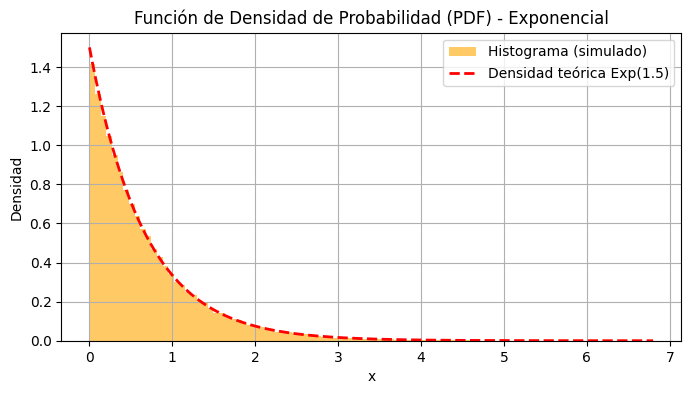

In [ ]:
# === GRAFICAR HISTOGRAMA + DENSIDAD TEÓRICA ===
x_exp_vals = np.linspace(0, max(datos_exp), 1000)
pdf_exp = lmbda * np.exp(-lmbda * x_exp_vals)

plt.figure(figsize=(8, 4))
plt.hist(datos_exp, bins=100, density=True, alpha=0.6, label="Histograma (simulado)", color='orange')
plt.plot(x_exp_vals, pdf_exp, 'r--', label=f'Densidad teórica Exp({lmbda})', linewidth=2)
plt.title('Función de Densidad de Probabilidad (PDF) - Exponencial')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

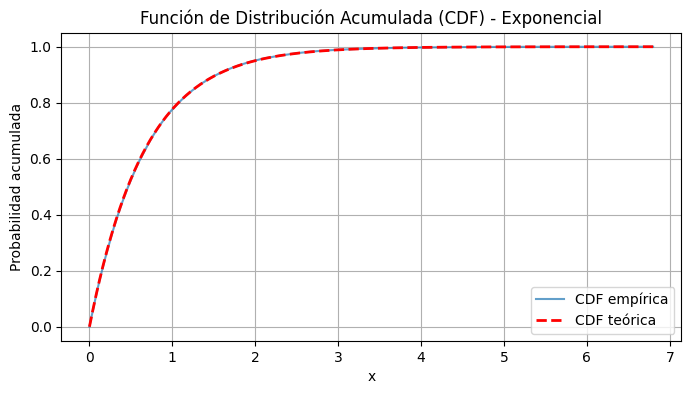

In [ ]:
# === GRAFICAR FUNCION ACUMULADA ===
datos_exp_ordenados = np.sort(datos_exp)
y_cdf_exp = np.arange(1, k_exp + 1) / k_exp

def cdf_exponencial(x, lam):
    return np.where(x < 0, 0, 1 - np.exp(-lam * x))

x_cdf_exp = np.linspace(0, max(datos_exp), 1000)
cdf_exp_teo = cdf_exponencial(x_cdf_exp, lmbda)

plt.figure(figsize=(8, 4))
plt.plot(datos_exp_ordenados, y_cdf_exp, label='CDF empírica', alpha=0.7)
plt.plot(x_cdf_exp, cdf_exp_teo, 'r--', label='CDF teórica', linewidth=2)
plt.title('Función de Distribución Acumulada (CDF) - Exponencial')
plt.xlabel('x')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.grid(True)
plt.show()

## Distribución m-Erlang
## $X \sim Erlang(m,\lambda)$

### Definición:  
La distribución m-Erlang es un caso particular de la distribución Gamma, en donde el parámetro de forma $k = m$ es un entero positivo. Es utilizada para modelar el tiempo hasta la ocurrencia del $m$-ésimo evento en un proceso de Poisson con tasa $\lambda$.

### Notación:
$$
X \sim \text{Erlang}(m, \lambda)
\quad \text{donde } m \in \mathbb{N},\ \lambda > 0
$$

### Función de Densidad de Probabilidad (PDF)

$$
f(x) =
\begin{cases}
\dfrac{\lambda^m x^{m - 1} e^{-\lambda x}}{(m - 1)!}, & x \geq 0 \\
0, & x < 0
\end{cases}
$$

### Función de Distribución Acumulada (CDF)

$$
F(x) =
\begin{cases}
1 - \sum\limits_{k=0}^{m-1} \dfrac{(\lambda x)^k e^{-\lambda x}}{k!}, & x \geq 0 \\
0, & x < 0
\end{cases}
$$

### Media

$$
\mu = \mathbb{E}[X] = \frac{m}{\lambda}
$$

### Varianza

$$
\text{Var}(X) = \frac{m}{\lambda^2}
$$

### Desviación Estándar

$$
\sigma = \sqrt{Var(X)} = \frac{\sqrt{m}}{\lambda}
$$

### Pseudocódigo para simular una variable aleatoria Erlang $(m, \lambda)$

Entradas:

    m: número de etapas (entero positivo)
    λ: tasa del proceso (λ > 0)

Procedimiento:

1. Inicializar $X = 0$

2. Para $i = 1$ hasta $m$ hacer:

    a. Generar $U \sim Uniforme(0, 1)$

    b. Calcular $E = - \frac{ln(U)}{λ}$

    c. Acumular: $X ← X + E$
3. Retornar $X$


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from math import log, factorial

In [10]:
# Parámetros de la distribución Erlang
erlang_m = 4       # número de etapas
erlang_lambda = 1.2  # tasa λ > 0

In [11]:
# Teóricos
erlang_media_teo = erlang_m / erlang_lambda
erlang_var_teo = erlang_m / (erlang_lambda ** 2)
erlang_std_teo = np.sqrt(erlang_var_teo)

In [12]:
# Función para simular la distribución m-Erlang
def simular_erlang(n):
    lista_erlang = []
    for _ in range(n):
        x_erl = 0
        for _ in range(erlang_m):
            U = random()
            x_erl += -log(U) / erlang_lambda
        lista_erlang.append(x_erl)
    return lista_erlang

In [13]:
# Número de simulaciones
k_erlang = 100000

# Llamada a la función
datos_erlang = simular_erlang(k_erlang)

In [14]:
# Estadísticas empíricas
erlang_media_emp = np.mean(datos_erlang)
erlang_var_emp = np.var(datos_erlang)
erlang_std_emp = np.std(datos_erlang)

In [15]:
# Imprimir resultados
print(f"Distribución Erlang con m = {erlang_m}, λ = {erlang_lambda}, simulaciones: {k_erlang}")
print(f"Media teórica: {erlang_media_teo:.4f} | Empírica: {erlang_media_emp:.4f}")
print(f"Varianza teórica: {erlang_var_teo:.4f} | Empírica: {erlang_var_emp:.4f}")
print(f"Desviación estándar teórica: {erlang_std_teo:.4f} | Empírica: {erlang_std_emp:.4f}")
print("")

Distribución Erlang con m = 4, λ = 1.2, simulaciones: 100000
Media teórica: 3.3333 | Empírica: 3.3241
Varianza teórica: 2.7778 | Empírica: 2.7542
Desviación estándar teórica: 1.6667 | Empírica: 1.6596



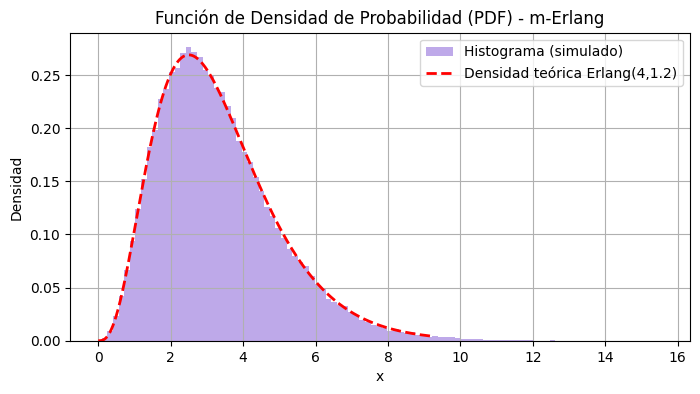

In [16]:
# === GRAFICAR HISTOGRAMA + DENSIDAD TEÓRICA ===
x_erl = np.linspace(0, np.percentile(datos_erlang, 99.5), 1000)
pdf_erlang = (erlang_lambda**erlang_m) * (x_erl**(erlang_m - 1)) * np.exp(-erlang_lambda * x_erl) / factorial(erlang_m - 1)

plt.figure(figsize=(8, 4))
plt.hist(datos_erlang, bins=100, density=True, alpha=0.6, label="Histograma (simulado)", color='mediumpurple')
plt.plot(x_erl, pdf_erlang, 'r--', label=f'Densidad teórica Erlang({erlang_m},{erlang_lambda})', linewidth=2)
plt.title('Función de Densidad de Probabilidad (PDF) - m-Erlang')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

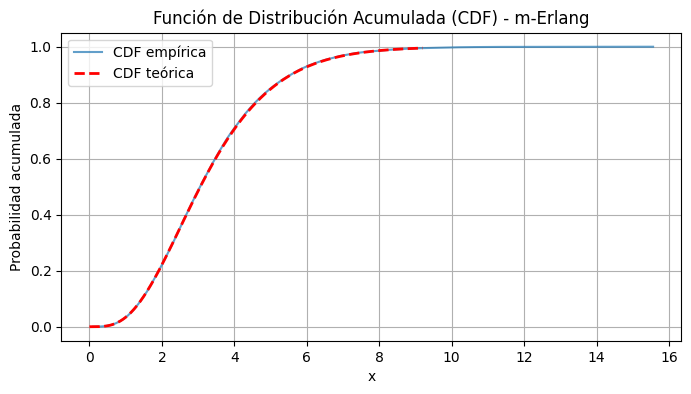

In [17]:
# === GRAFICAR FUNCION ACUMULADA ===
datos_erl_ordenados = np.sort(datos_erlang)
y_cdf_erl = np.arange(1, k_erlang + 1) / k_erlang

def cdf_erlang(x, m, lmb):
    # Suma de términos de la CDF teórica
    cdf = np.zeros_like(x)
    for k in range(m):
        cdf += ((lmb * x) ** k) / factorial(k)
    return 1 - np.exp(-lmb * x) * cdf

x_vals_erl = np.linspace(0, np.percentile(datos_erlang, 99.5), 1000)
cdf_teo_erl = cdf_erlang(x_vals_erl, erlang_m, erlang_lambda)

plt.figure(figsize=(8, 4))
plt.plot(datos_erl_ordenados, y_cdf_erl, label='CDF empírica', alpha=0.7)
plt.plot(x_vals_erl, cdf_teo_erl, 'r--', label='CDF teórica', linewidth=2)
plt.title('Función de Distribución Acumulada (CDF) - m-Erlang')
plt.xlabel('x')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.grid(True)
plt.show()

## Distribución Gamma $X \sim \Gamma (\alpha, \lambda)$

### Definición:  
La distribución Gamma es una distribución continua que generaliza la distribución Erlang. Se define mediante dos parámetros positivos: $ \alpha$ (forma) y $\lambda$ (tasa). Es usada para modelar el tiempo hasta que ocurren $\alpha$ eventos en un proceso de Poisson (donde $ \alpha$ no necesariamente es entero).

### Notación:  
$$
X \sim \text{Gamma}(\alpha, \lambda)
\quad \text{con } \alpha > 0, \ \lambda > 0
$$

### Función de Densidad de Probabilidad (PDF)

$$
f(x) =
\begin{cases}
\dfrac{\lambda^\alpha x^{\alpha - 1} e^{-\lambda x}}{\Gamma(\alpha)}, & x \geq 0 \\
0, & x < 0
\end{cases}
$$

donde $\Gamma(\alpha)$ es la función gamma:
$$
\Gamma(\alpha) = \int_0^\infty t^{\alpha - 1} e^{-t} dt
$$

### Función de Distribución Acumulada (CDF)

$$
F(x) =
\begin{cases}
\dfrac{1}{\Gamma(\alpha)} \int_0^{\lambda x} t^{\alpha - 1} e^{-t} dt = \dfrac{\gamma(\alpha, \lambda x)}{\Gamma(\alpha)}, & x \geq 0 \\
0, & x < 0
\end{cases}
$$

donde $\gamma(\alpha, z)$ es la función gamma incompleta inferior:
$$
\gamma(\alpha, z) = \int_0^z t^{\alpha - 1} e^{-t} dt
$$

### Media

$$
\mu = \mathbb{E}[X] = \frac{\alpha}{\lambda}
$$

### Varianza

$$
\text{Var}(X) = \frac{\alpha}{\lambda^2}
$$

### Desviación Estándar

$$
\sigma = \sqrt{Var(X)} = \frac{\sqrt{\alpha}}{\lambda}
$$

### Pseudocódigo para simular una variable Gamma $(\alpha, \lambda)$ con $\alpha$ entero positivo

Entradas:

    α: parámetro de forma (entero positivo)
    λ: parámetro de tasa (λ > 0)

Procedimiento:

1. Inicializar $X = 0$

2. Para i = 1 hasta α hacer:

    a. Generar $U \sim Uniforme(0, 1)$
    
    b. Calcular $E = -\frac{ln(U)}{λ}$
    
    c. Acumular: $X ← X + E$
3. Retornar $X$


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from math import log, gamma

In [20]:
# Parámetros de la distribución Gamma
gamma_alpha = 5     # parámetro de forma (entero)
gamma_lambda = 1.0  # parámetro de tasa

In [21]:
# Cálculo teórico
gamma_media_teo = gamma_alpha / gamma_lambda
gamma_var_teo = gamma_alpha / (gamma_lambda**2)
gamma_std_teo = np.sqrt(gamma_var_teo)

In [22]:
# Simulación usando suma de exponenciales
def simular_gamma(n):
    muestras_gamma = []
    for _ in range(n):
        x_gamma = 0
        for _ in range(gamma_alpha):
            U = random()
            x_gamma += -log(U) / gamma_lambda
        muestras_gamma.append(x_gamma)
    return muestras_gamma

In [23]:
# Número de simulaciones
k_gamma = 100000

# Llamada a la función
datos_gamma = simular_gamma(k_gamma)

In [24]:
# Estadísticas empíricas
gamma_media_emp = np.mean(datos_gamma)
gamma_var_emp = np.var(datos_gamma)
gamma_std_emp = np.std(datos_gamma)

In [25]:
# Imprimir resultados
print(f"Distribución Gamma con α = {gamma_alpha}, λ = {gamma_lambda}, simulaciones: {k_gamma}")
print(f"Media teórica: {gamma_media_teo:.4f} | Empírica: {gamma_media_emp:.4f}")
print(f"Varianza teórica: {gamma_var_teo:.4f} | Empírica: {gamma_var_emp:.4f}")
print(f"Desviación estándar teórica: {gamma_std_teo:.4f} | Empírica: {gamma_std_emp:.4f}")
print("")

Distribución Gamma con α = 5, λ = 1.0, simulaciones: 100000
Media teórica: 5.0000 | Empírica: 4.9949
Varianza teórica: 5.0000 | Empírica: 4.9144
Desviación estándar teórica: 2.2361 | Empírica: 2.2168



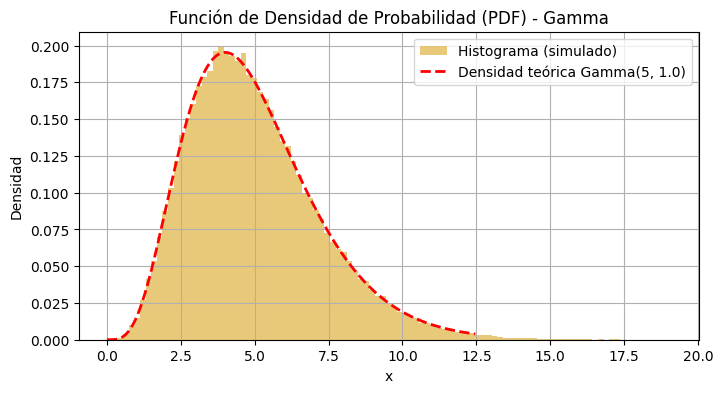

In [26]:
# === GRAFICAR HISTOGRAMA + DENSIDAD TEÓRICA ===
x_gamma_vals = np.linspace(0, np.percentile(datos_gamma, 99.5), 1000)
pdf_gamma = (gamma_lambda**gamma_alpha) * (x_gamma_vals**(gamma_alpha - 1)) * \
            np.exp(-gamma_lambda * x_gamma_vals) / gamma(gamma_alpha)

plt.figure(figsize=(8, 4))
plt.hist(datos_gamma, bins=100, density=True, alpha=0.6, label='Histograma (simulado)', color='goldenrod')
plt.plot(x_gamma_vals, pdf_gamma, 'r--', label=f'Densidad teórica Gamma({gamma_alpha}, {gamma_lambda})', linewidth=2)
plt.title('Función de Densidad de Probabilidad (PDF) - Gamma')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

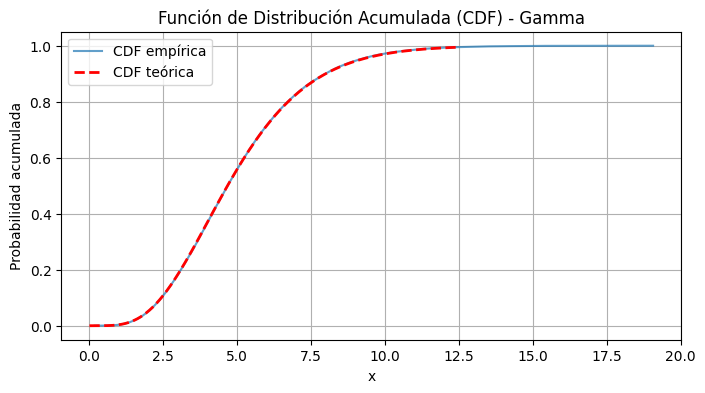

In [27]:
# === GRAFICAR FUNCION ACUMULADA ===
datos_gamma_ordenados = np.sort(datos_gamma)
y_cdf_gamma = np.arange(1, k_gamma + 1) / k_gamma

from scipy.special import gammainc

def cdf_gamma(x, alpha, lambd):
    return gammainc(alpha, lambd * x)

x_vals_gamma = np.linspace(0, np.percentile(datos_gamma, 99.5), 1000)
cdf_gamma_teo = cdf_gamma(x_vals_gamma, gamma_alpha, gamma_lambda)

plt.figure(figsize=(8, 4))
plt.plot(datos_gamma_ordenados, y_cdf_gamma, label='CDF empírica', alpha=0.7)
plt.plot(x_vals_gamma, cdf_gamma_teo, 'r--', label='CDF teórica', linewidth=2)
plt.title('Función de Distribución Acumulada (CDF) - Gamma')
plt.xlabel('x')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.grid(True)
plt.show()

## Distribución Weibull $$

### Definición:
La distribución Weibull es una distribución continua que se usa frecuentemente en análisis de confiabilidad y vida útil de productos. Está definida por dos parámetros positivos: $\lambda > 0$ (escala) y $k > 0$ (forma).

### Notación:  
$$
X \sim \text{Weibull}(k, \lambda)
$$

### Función de Densidad de Probabilidad (PDF)

$$
f(x) =
\begin{cases}
\frac{k}{\lambda} \left( \frac{x}{\lambda} \right)^{k - 1} e^{-(x / \lambda)^k}, & x \geq 0 \\
0, & x < 0
\end{cases}
$$

### Función de Distribución Acumulada (CDF)

$$
F(x) =
\begin{cases}
1 - e^{-(x / \lambda)^k}, & x \geq 0 \\
0, & x < 0
\end{cases}
$$

### Media

$$
\mu = \mathbb{E}[X] = \lambda \, \Gamma\left(1 + \frac{1}{k}\right)
$$

### Varianza

$$
\text{Var}(X) = \lambda^2 \left[ \Gamma\left(1 + \frac{2}{k}\right) - \left(\Gamma\left(1 + \frac{1}{k}\right)\right)^2 \right]
$$

### Desviación Estándar

$$
\sigma = \sqrt{Var(X)}
$$

donde $\Gamma(\cdot)$ es la función Gamma de Euler.

### Pseudocódigo para simular una variable Weibull $(k, \lambda)$

Entradas:

    k: parámetro de forma (k > 0)

    λ: parámetro de escala (λ > 0)

Procedimiento:

1. Generar $U \sim Uniforme(0, 1)$

2. Calcular $X = \lambda * [ -ln(1 - U) ]^{\frac{1}{k}}$

3. Retornar $X$


Distribución Weibull con k = 1.5, λ = 2.0, simulaciones: 100000
Media teórica: 1.8055 | Empírica: 1.8062
Varianza teórica: 1.5028 | Empírica: 1.5005
Desviación estándar teórica: 1.2259 | Empírica: 1.2250



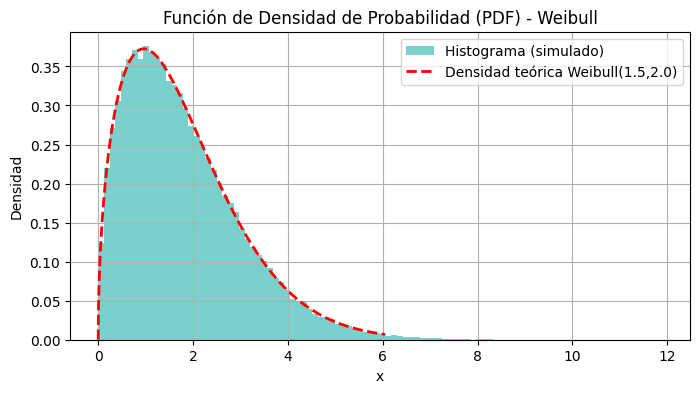

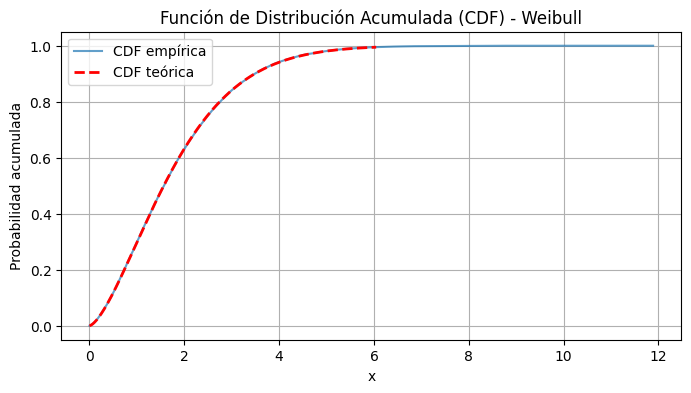

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from math import log, gamma

# Parámetros de la distribución Weibull
weib_k = 1.5      # parámetro de forma (k > 0)
weib_lambda = 2.0  # parámetro de escala (λ > 0)

# Valores teóricos
weib_media_teo = weib_lambda * gamma(1 + 1 / weib_k)
weib_var_teo = weib_lambda**2 * (gamma(1 + 2 / weib_k) - (gamma(1 + 1 / weib_k))**2)
weib_std_teo = np.sqrt(weib_var_teo)

# Simulación con la transformada inversa
def simular_weibull(n):
    lista_weib = []
    for _ in range(n):
        U = random()
        x_weib = weib_lambda * (-log(U))**(1 / weib_k)
        lista_weib.append(x_weib)
    return lista_weib

# Número de simulaciones
k_weibull = 100000

# Llamada a la función
datos_weib = simular_weibull(k_weibull)

# Estadísticas empíricas
weib_media_emp = np.mean(datos_weib)
weib_var_emp = np.var(datos_weib)
weib_std_emp = np.std(datos_weib)

# Imprimir resultados
print(f"Distribución Weibull con k = {weib_k}, λ = {weib_lambda}, simulaciones: {k_weibull}")
print(f"Media teórica: {weib_media_teo:.4f} | Empírica: {weib_media_emp:.4f}")
print(f"Varianza teórica: {weib_var_teo:.4f} | Empírica: {weib_var_emp:.4f}")
print(f"Desviación estándar teórica: {weib_std_teo:.4f} | Empírica: {weib_std_emp:.4f}")
print("")

# === GRAFICAR HISTOGRAMA + DENSIDAD TEÓRICA ===
x_weib = np.linspace(0, np.percentile(datos_weib, 99.5), 1000)
pdf_weib = (weib_k / weib_lambda) * (x_weib / weib_lambda)**(weib_k - 1) * np.exp(-(x_weib / weib_lambda)**weib_k)

plt.figure(figsize=(8, 4))
plt.hist(datos_weib, bins=100, density=True, alpha=0.6, label="Histograma (simulado)", color='lightseagreen')
plt.plot(x_weib, pdf_weib, 'r--', label=f'Densidad teórica Weibull({weib_k},{weib_lambda})', linewidth=2)
plt.title('Función de Densidad de Probabilidad (PDF) - Weibull')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

# === GRAFICAR FUNCIÓN ACUMULADA ===
datos_weib_ordenados = np.sort(datos_weib)
y_cdf_weib = np.arange(1, k_weibull + 1) / k_weibull

def cdf_weibull(x, k, lam):
    return 1 - np.exp(-(x / lam) ** k)

x_vals_weib = np.linspace(0, np.percentile(datos_weib, 99.5), 1000)
cdf_weib_teo = cdf_weibull(x_vals_weib, weib_k, weib_lambda)

plt.figure(figsize=(8, 4))
plt.plot(datos_weib_ordenados, y_cdf_weib, label='CDF empírica', alpha=0.7)
plt.plot(x_vals_weib, cdf_weib_teo, 'r--', label='CDF teórica', linewidth=2)
plt.title('Función de Distribución Acumulada (CDF) - Weibull')
plt.xlabel('x')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.grid(True)
plt.show()


## Distribución Normal

### Definición:  
La distribución normal es una distribución continua simétrica en forma de campana, utilizada ampliamente en estadística para modelar fenómenos naturales. Se define por dos parámetros: la media $\mu$ y la desviación estándar $\sigma$.

### Notación:  
$$
X \sim \mathcal{N}(\mu, \sigma^2)
$$

### Función de Densidad de Probabilidad (PDF)

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right), \quad x \in \mathbb{R}
$$

### Función de Distribución Acumulada (CDF)

$$
F(x) = \frac{1}{\sigma \sqrt{2\pi}} \int_{-\infty}^{x} \exp\left( -\frac{(t - \mu)^2}{2\sigma^2} \right) dt
$$

*Nota:* No tiene una forma cerrada en términos de funciones elementales. Se evalúa numéricamente o con funciones especiales como la función error:
$$
F(x) = \frac{1}{2} \left[ 1 + \text{erf}\left( \frac{x - \mu}{\sigma \sqrt{2}} \right) \right]
$$

### Media

$$
\mu = \mathbb{E}[X]
$$

### Varianza

$$
\text{Var}(X) = \sigma^2
$$

### Desviación Estándar

$$
\sigma = \sqrt{Var(X)}
$$

### Pseudocódigo para simular una variable Normal $(\mu, \sigma^2)$ (método Box-Muller)

Entradas:

    μ: media
    σ: desviación estándar

Procedimiento:

 1. Generar dos variables aleatorias independientes $U_1$ y $U_2$ $ \sim  Uniforme(0, 1)$

2. Calcular:
    
    $Z = \sqrt{-2 * ln(U_1)} * cos(2 * \pi * U_2)$

3. Transformar:
    $X = \mu + \sigma * Z$

4. Retornar $X$




In [32]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from math import sqrt, log, pi, cos
from scipy.special import erf  # ✅ versión compatible con arrays

In [33]:
# Parámetros de la distribución normal
norm_mu = 5       # media
norm_sigma = 1.5  # desviación estándar

In [34]:
# Valores teóricos
norm_media_teo = norm_mu
norm_var_teo = norm_sigma**2
norm_std_teo = norm_sigma

In [35]:
# Simulación usando el método de Box-Muller
def simular_normal(n):
    muestras_norm = []
    for _ in range(n):
        U1 = random()
        U2 = random()
        Z = sqrt(-2 * log(U1)) * cos(2 * pi * U2)
        X = norm_mu + norm_sigma * Z
        muestras_norm.append(X)
    return muestras_norm

In [36]:
# Número de simulaciones
k_norm = 100000

# Llamada a la función
datos_norm = simular_normal(k_norm)

In [37]:
# Estadísticas empíricas
norm_media_emp = np.mean(datos_norm)
norm_var_emp = np.var(datos_norm)
norm_std_emp = np.std(datos_norm)

In [38]:
# Imprimir resultados
print(f"Distribución Normal con μ = {norm_mu}, σ = {norm_sigma}, simulaciones: {k_norm}")
print(f"Media teórica: {norm_media_teo:.4f} | Empírica: {norm_media_emp:.4f}")
print(f"Varianza teórica: {norm_var_teo:.4f} | Empírica: {norm_var_emp:.4f}")
print(f"Desviación estándar teórica: {norm_std_teo:.4f} | Empírica: {norm_std_emp:.4f}")
print("")

Distribución Normal con μ = 5, σ = 1.5, simulaciones: 100000
Media teórica: 5.0000 | Empírica: 4.9953
Varianza teórica: 2.2500 | Empírica: 2.2371
Desviación estándar teórica: 1.5000 | Empírica: 1.4957



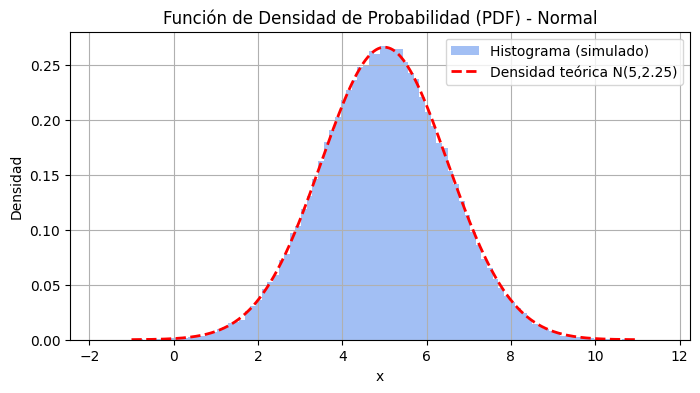

In [39]:
# === GRAFICAR HISTOGRAMA + DENSIDAD TEÓRICA ===
x_norm_vals = np.linspace(norm_mu - 4*norm_sigma, norm_mu + 4*norm_sigma, 1000)
pdf_norm = (1 / (norm_sigma * sqrt(2 * pi))) * np.exp(-0.5 * ((x_norm_vals - norm_mu) / norm_sigma)**2)

plt.figure(figsize=(8, 4))
plt.hist(datos_norm, bins=100, density=True, alpha=0.6, label="Histograma (simulado)", color='cornflowerblue')
plt.plot(x_norm_vals, pdf_norm, 'r--', label=f'Densidad teórica N({norm_mu},{norm_sigma**2})', linewidth=2)
plt.title('Función de Densidad de Probabilidad (PDF) - Normal')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

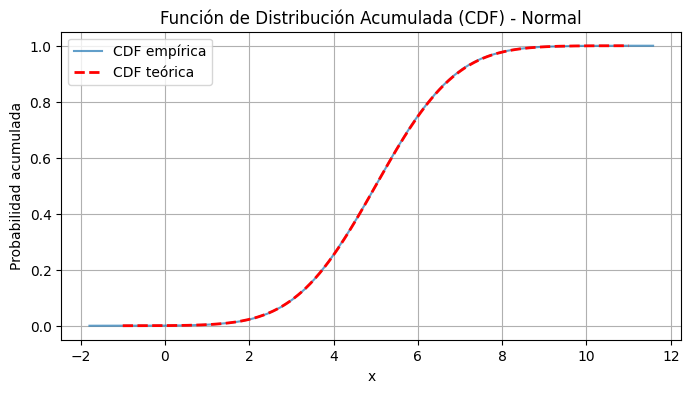

In [40]:
# === GRAFICAR FUNCIÓN ACUMULADA ===
datos_norm_ordenados = np.sort(datos_norm)
y_cdf_norm = np.arange(1, k_norm + 1) / k_norm

def cdf_normal(x, mu, sigma):
    return 0.5 * (1 + erf((x - mu) / (sigma * sqrt(2))))

x_vals_norm = np.linspace(norm_mu - 4*norm_sigma, norm_mu + 4*norm_sigma, 1000)
cdf_norm_teo = cdf_normal(x_vals_norm, norm_mu, norm_sigma)

plt.figure(figsize=(8, 4))
plt.plot(datos_norm_ordenados, y_cdf_norm, label='CDF empírica', alpha=0.7)
plt.plot(x_vals_norm, cdf_norm_teo, 'r--', label='CDF teórica', linewidth=2)
plt.title('Función de Distribución Acumulada (CDF) - Normal')
plt.xlabel('x')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.grid(True)
plt.show()